In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path=(r'C:\Users\Akash Choudhary\Desktop\Interview Preparation\Projects\Time Series Project ( Stock Market case-study )\Data\individual_stocks_5yr')

In [3]:
import os

In [4]:
all_files=os.listdir(path)

In [5]:
all_files[1:10]

['AAPL_data.csv',
 'AAP_data.csv',
 'ABBV_data.csv',
 'ABC_data.csv',
 'ABT_data.csv',
 'ACN_data.csv',
 'ADBE_data.csv',
 'ADI_data.csv',
 'ADM_data.csv']

- <span style="background-color:yellow">I have huge data set of stocks. So I will choose some selected company stocks data</span>

In [6]:
#Companies are Google,Microsoft,Amazon, Apple
company_list=['AAPL_data.csv','GOOGL_data.csv','MSFT_data.csv','AMZN_data.csv']
all_data=pd.DataFrame()
for file in company_list:
    current_df=pd.read_csv(path+"/"+ file)
    all_data=pd.concat([all_data,current_df])

In [7]:
#shape of data
all_data.shape

(5036, 7)

In [8]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


# Analyze Closing Price of the stocks

In [9]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

Here date is the string type but It should be in data-time format

In [10]:
#coverting date column in date-time format
all_data['date']=pd.to_datetime(all_data['date'])

In [11]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [12]:
tech_list=all_data['Name'].unique()

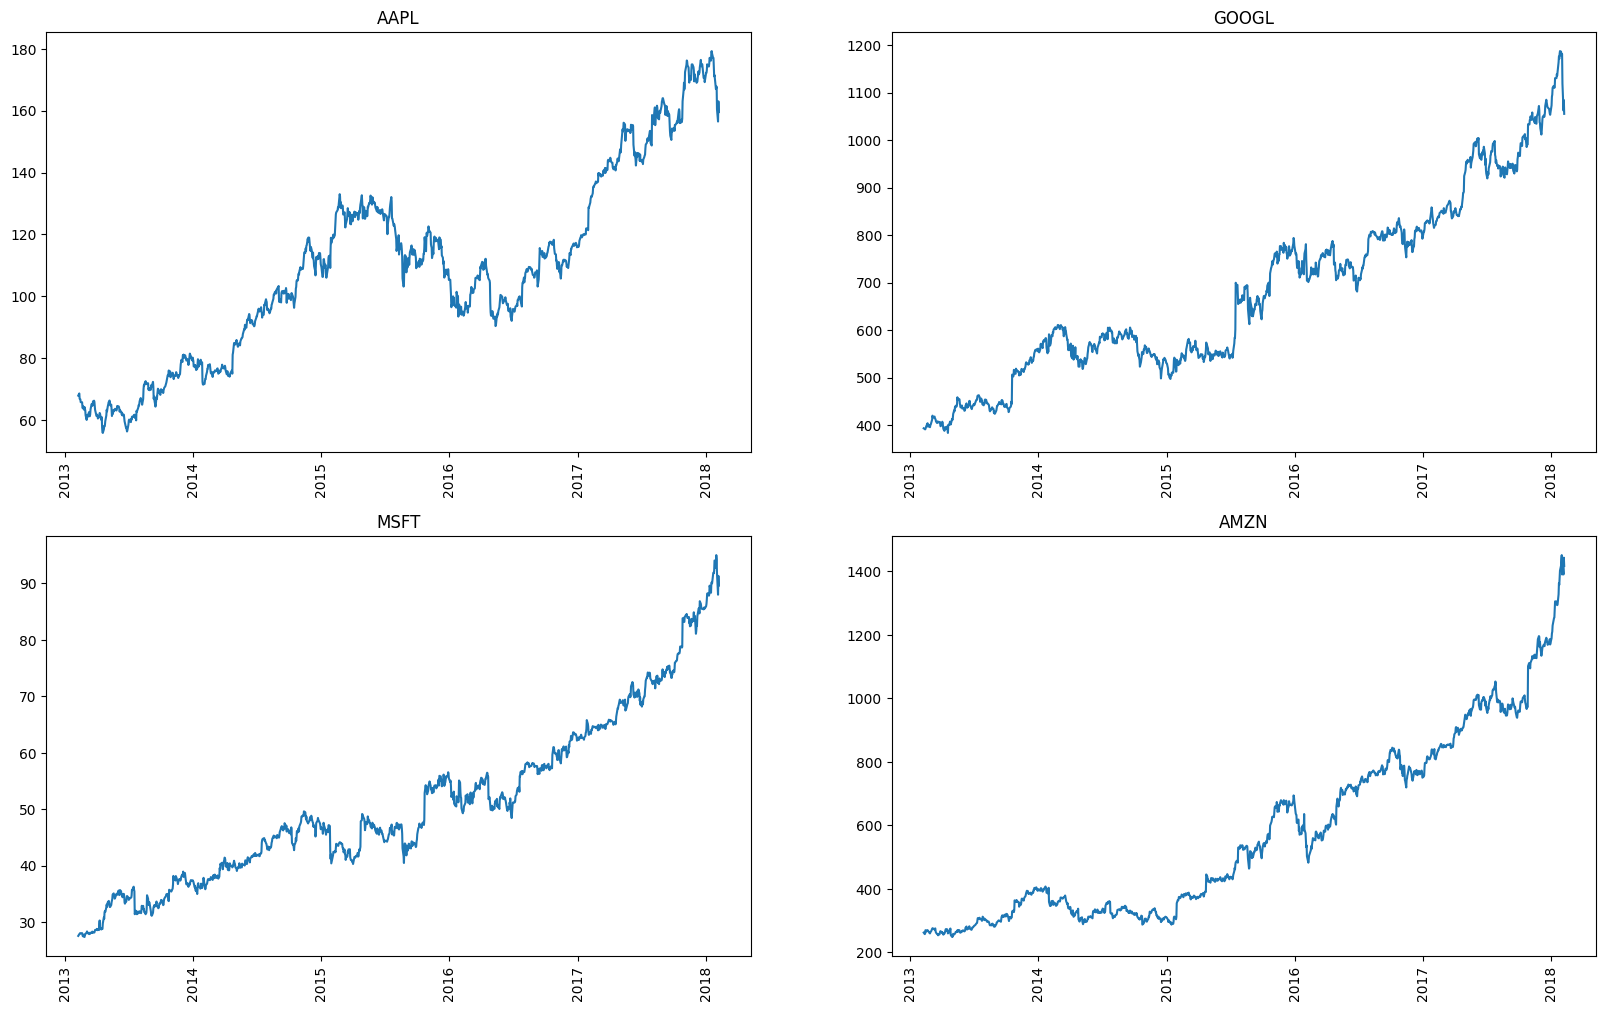

In [13]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.xticks(rotation='vertical')
    plt.title(company)

<span style="background-color:yellow">On x-axis data is over lapped. So I need increase the fig size and change the rotation on x-axis</span>
- still overlapping. it looks some datatype issue of data column.

# Analyze Total volume of stocks traded each day

In [14]:
import plotly.express as px

In [15]:
!pip install -U kaleido

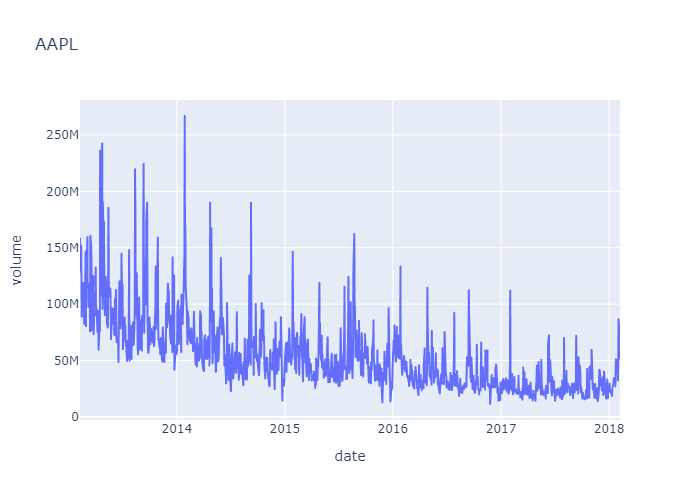

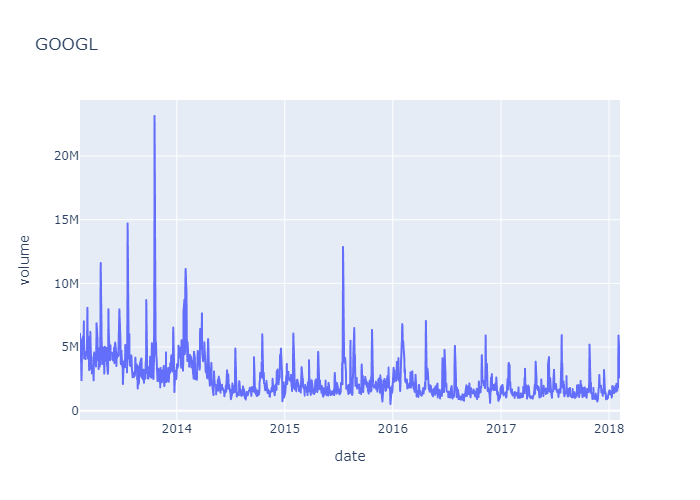

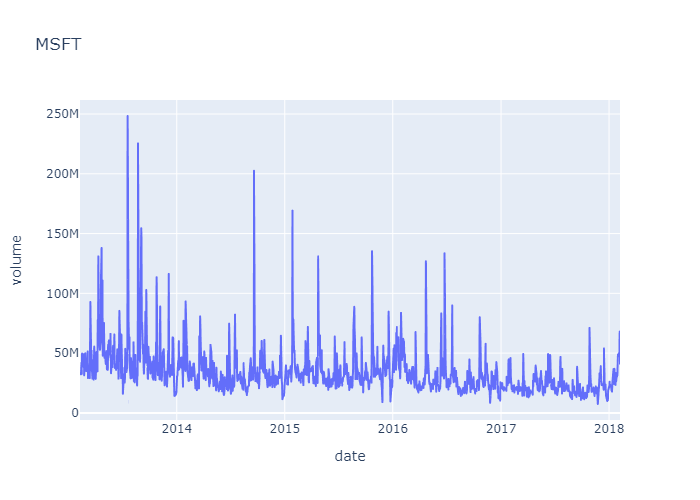

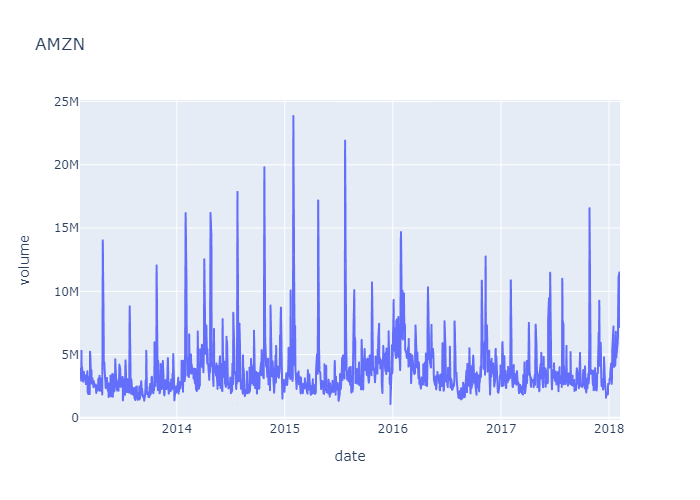

In [16]:
for company in tech_list:
    df=all_data[all_data['Name']==company]
    fig=px.line(df,x='date',y='volume',title=company)
    fig.show("png")

# Analyse Daily price change in the stocks

In [17]:
#I am goin to analyse google dataset
df=pd.read_csv(path+'/'+'AAPL_data.csv')

In [18]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [19]:
df['Daily_Price_Chng']=df['close']-df['open']

In [20]:
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_Chng
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [21]:
df['1Day % return']=((df['close']-df['open'])/df['close'])*100

In [22]:
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_Chng,1Day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


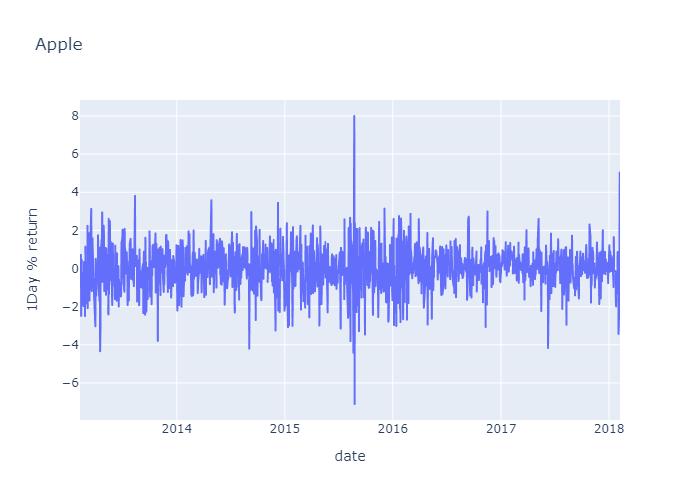

In [23]:
fig=px.line(df,x='date',y='1Day % return',title='Apple')
fig.show("png")

### Conclusion
- <span style="background-color:yellow">On Aug 24,2015 Apple stocks return was <b>+8 %</b></span>
-   -> This boom may be because of some factors or some of the government policy or may Apple launches his own product
- <span style="background-color:yellow">But On Aug 25,2015 Apple stocks return was <b> -7.10 %</b></span>

# Analyse Monthly Mean of Close Feature

In [24]:
df2=df.copy()

In [25]:
df2.dtypes

date                 object
open                float64
high                float64
low                 float64
close               float64
volume                int64
Name                 object
Daily_Price_Chng    float64
1Day % return       float64
dtype: object

- <span style="background-color:yellow">Here date is of <b>object type</b>. I need to change this in datetime format</span>

In [26]:
df2['date']=pd.to_datetime(df2['date'])

In [27]:
df2.dtypes

date                datetime64[ns]
open                       float64
high                       float64
low                        float64
close                      float64
volume                       int64
Name                        object
Daily_Price_Chng           float64
1Day % return              float64
dtype: object

In [28]:
df2.set_index('date',inplace=True) #So let's say I have to grab data between some interval 
                                   #so I can easily grab that data by passing a date between some interval.
                                   #That's why I'm setting date as index

In [29]:
df2.head()

,open,high,low,close,volume,Name,Daily_Price_Chng,1Day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [30]:
#Let's I have to graab the date between 2013-2014
df2['2013-01-01':'2014-01-01']

,open,high,low,close,volume,Name,Daily_Price_Chng,1Day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624
...,...,...,...,...,...,...,...,...
2013-12-24,81.4128,81.6971,80.8613,81.0956,41888735,AAPL,-0.3172,-0.391143
2013-12-26,81.1571,81.3571,80.4822,80.5571,51002035,AAPL,-0.6000,-0.744813
2013-12-27,80.5456,80.6299,79.9285,80.0128,56471317,AAPL,-0.5328,-0.665893


In [31]:
#Analyse Monthly Mean of Close Feature
df2['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot:xlabel='date'>

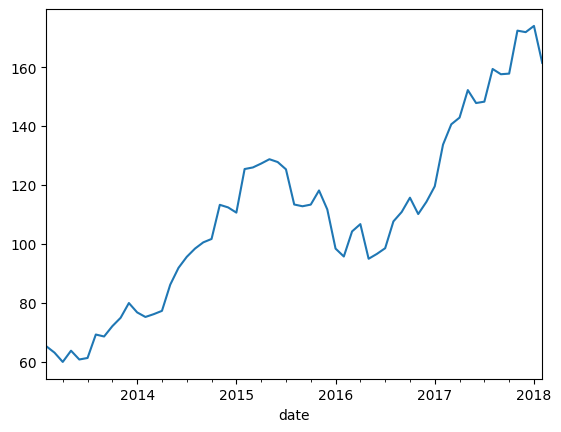

In [32]:
#plot graph
df2['close'].resample('M').mean().plot()

In [33]:
#I want to resaple on year-wise
df2['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

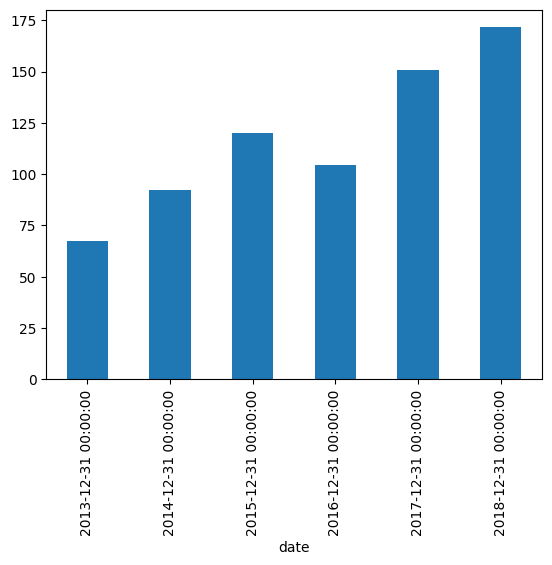

In [34]:
#plot
df2['close'].resample('Y').mean().plot(kind="bar")

# Analyse the stock's closing price of the companies are correlates or not

In [35]:
all_data.shape

(5036, 7)

In [37]:
all_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [38]:
all_data['Name'].unique()

array(['AAPL', 'GOOGL', 'MSFT', 'AMZN'], dtype=object)

In [54]:
apple=all_data[all_data['Name']=="AAPL"]
google=all_data[all_data['Name']=="GOOGL"]
microsoft=all_data[all_data['Name']=="MSFT"]
amazon=all_data[all_data['Name']=="AMZN"]

In [51]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [46]:
google.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


In [52]:
microsoft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [55]:
amazon.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [57]:
stks_cls_prc=pd.DataFrame()
stks_cls_prc['apple']=apple['close']
stks_cls_prc['google']=google['close']
stks_cls_prc['microsoft']=microsoft['close']
stks_cls_prc['amazon']=amazon['close']

In [58]:
stks_cls_prc.head()

,apple,google,microsoft,amazon
0,67.8542,393.0777,27.55,261.95
1,68.5614,391.6012,27.86,257.21
2,66.8428,390.7403,27.88,258.70
3,66.7156,391.8214,28.03,269.47
4,66.6556,394.3039,28.04,269.24


In [59]:
#Correaltion
stks_cls_prc.corr()

,apple,google,microsoft,amazon
apple,1.000000,0.843736,0.899689,0.819078
google,0.843736,1.000000,0.970779,0.973988
microsoft,0.899689,0.970779,1.000000,0.955977
amazon,0.819078,0.973988,0.955977,1.000000


<AxesSubplot:>

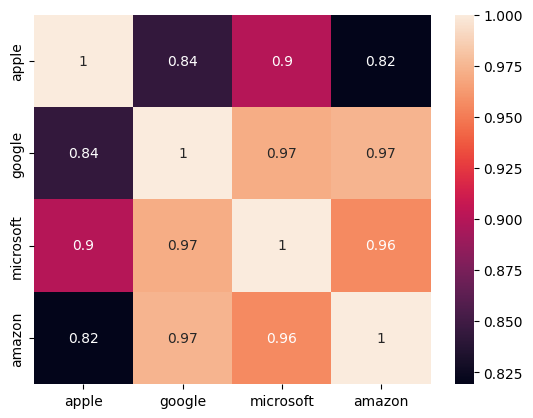

In [60]:
#Heat Map
import seaborn as sns
sns.heatmap(stks_cls_prc.corr(),annot=True)

### Conclusion
- Microsof, Amazon,Google stock's closing price is highly positive correlated
